# Trabajo Práctico N. ° 1: Análisis exploratorio de datos de TROCAFONE

Primero se cargarán los datos propuestos por la cátedra y se hará un análisis inicial del dataframe.


In [1]:
# importacion general de librerias 
# y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

events = pd.read_csv('./data/events.csv')

pd.set_option('display.max_columns', 51)

In [2]:
# analizemos primero las dimensiones del data frame
events.shape

(1011288, 23)

Como se puede observar pandas al levantar los datos de TROCAFONE interpreta todos como object, incluso los timestamps. Tendremos que trabajar sobre los datos si queremos otro tipo de datos.

A continuación se explica a qué corresponde cada columna según el enunciado:

* **timestamp**: Fecha y hora cuando ocurrió el evento. (considerar BRT/ART).
* **event**: Tipo de evento
* **person**: Identificador de cliente que realizó el evento.
* **url**: Url visitada por el usuario.
* **sku**: Identificador de producto relacionado al evento.
* **model**: Nombre descriptivo del producto incluyendo marca y modelo.
* **condition**: Condición de venta del producto
* **storage**: Cantidad de almacenamiento del producto.
* **color**: Color del producto
* **skus**: Identificadores de productos visualizados en el evento.
* **search_term**: Términos de búsqueda utilizados en el evento.
* **staticpage**: Identificador de página estática visitada
* **campaign_source**: Origen de campaña, si el tráfico se originó de una campaña de marketing
* **search_engine**: Motor de búsqueda desde donde se originó el evento, si aplica.
* **channel**: Tipo de canal desde donde se originó el evento.
* **new_vs_returning**: Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.
* **city**: Ciudad desde donde se originó el evento
* **region**: Región desde donde se originó el evento.
* **country**: País desde donde se originó el evento.
* **device_type**: Tipo de dispositivo desde donde se genero el evento.
* **screen_resolution**: Resolución de pantalla que se está utilizando en el dispositivo desde donde se genero el evento.
* **operating_system_version**: Version de sistema operativo desde donde se origino el evento.
* **browser_version**: Versión del browser utilizado en el evento 


### Análisis de las categorías de eventos que pueden ocurrir
Para comenzar a orientar el análisis veremos que tipos de eventos ocurren en trocafone y qué cantidad de éstos ocurrió de cada uno.

In [3]:
# veamos la informacion general del dataframe con info()
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
events_types = events['event']
events_counts = events_types.value_counts()
print(events_counts)

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64


Realizamos un gráfico de barras para observar estos datos:

Text(0,0.5,'Ocurrencias')

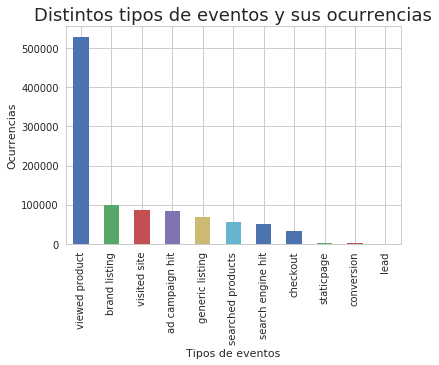

In [5]:
plot_events_counts = events_counts.plot.bar()
plot_events_counts.set_title("Distintos tipos de eventos y sus ocurrencias", fontsize=18)
plot_events_counts.set_xlabel("Tipos de eventos")
plot_events_counts.set_ylabel("Ocurrencias")

### Transformación de object a timestamp
Para poder trabajar con las fechas y hacer un análisis en base a esto debemos transformar los object a tipo de dato fecha.


In [6]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
# Vemos los tipos de datos
events.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

Agregamos las columnas de año y mes

In [70]:
events['year'] = events['timestamp'].dt.year
events['month'] = events['timestamp'].dt.month
events['month_day'] = events['timestamp'].dt.day
events['day_week'] = events['timestamp'].dt.dayofweek
events['week_year'] = events['timestamp'].dt.weekofyear
events['year_day'] = events['timestamp'].dt.dayofyear

# Agrego la columna de cantidad de eventos generados por cada usuario
events['cant_event_person'] = events.groupby('person')['person'].transform('count')

# Categorizamos las regiones geograficamente
events['geo_region'] = np.nan

events.loc[
    (events['region'] == 'Sao Paulo') |
    (events['region'] == 'Rio de Janeiro') |
    (events['region'] == 'Minas Gerais') |
    (events['region'] == 'Espirito Santo'), 
    'geo_region'
] = 'southeast'

events.loc[
    (events['region'] == 'Parana') |
    (events['region'] == 'Rio Grande do Sul') |
    (events['region'] == 'Santa Catarina'), 
    'geo_region'
] = 'south'

events.loc[
    (events['region'] == 'Federal District') |
    (events['region'] == 'Goias') |
    (events['region'] == 'Mato Grosso do Sul') |
    (events['region'] == 'Mato Grosso'), 
    'geo_region'
] = 'center west'

events.loc[
    (events['region'] == 'Bahia') |
    (events['region'] == 'Pernambuco') |
    (events['region'] == 'Ceara') |
    (events['region'] == 'Maranhao') |
    (events['region'] == 'Rio Grande do Norte') |
    (events['region'] == 'Paraíba') |
    (events['region'] == 'Piaui') |
    (events['region'] == 'Alagoas') |
    (events['region'] == 'Sergipe'), 
    'geo_region'
] = 'northeast'

events.loc[
    (events['region'] == 'Para') |
    (events['region'] == 'Amazonas') |
    (events['region'] == 'Tocantins') |
    (events['region'] == 'Amapa') |
    (events['region'] == 'Rondonia') |
    (events['region'] == 'Acre') |
    (events['region'] == 'Roraima'), 
    'geo_region'
] = 'north'

In [8]:
# Vemos algunos datos por las fechas
events_count_per_week = events['week_year'].value_counts()
# print(events['month'].value_counts()) Tenemos valores de enero a julio
# print(events['year'].value_counts()) Tenemos valores solo de 2018
# print(events['month_day'].value_counts())
# print(events['day_week'].value_counts())
events_count_per_week.sort_values(axis=0, ascending=True)
events_count_per_week = events_count_per_week.to_frame()
events_count_per_week['week'] = events_count_per_week.index
# print(events_count_per_week) Sin ordenar aun
# print(events['year_day'].value_counts())
# Ordenamos por semana del anio
events_count_per_week.sort_values(by='week', inplace=True)
print(events_count_per_week)


    week_year  week
1        2710     1
2        4497     2
3        4918     3
4        4922     4
5        5086     5
6        4989     6
7        6398     7
8        8822     8
9       10310     9
10      13879    10
11      16893    11
12      21607    12
13      21382    13
14      26487    14
15      28613    15
16      27712    16
17      38581    17
18      51040    18
19      72658    19
20     146430    20
21     124961    21
22     142782    22
23     140573    23
24      85038    24


In [68]:
# Sacamos los datos de la ultima semana ya que posiblemente no tengamos informacion de la semana completa
events_count_per_week = events_count_per_week.loc[events_count_per_week['week'] != 24]
# print(events_count_per_week)

Como podemos observar tenemos solo datos del año 2018 desde enero hasta junio. Tambien podemos ver que los usuarios suelen acceder a mas a TROCAFONE los dias de semana. 
A continuacion podemos ver como aumento la frecuencia de eventos a medida que avanzo el anio

Text(0,0.5,'Cantidad')

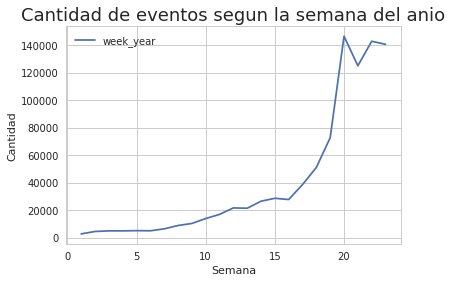

In [10]:
plot_events_per_week = events_count_per_week[['week_year']].plot.line()
plot_events_per_week.set_title("Cantidad de eventos segun la semana del anio", fontsize=18)
plot_events_per_week.set_xlabel("Semana")
plot_events_per_week.set_ylabel("Cantidad")


In [11]:
# Vemos los distintos valores de country
events['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Guadeloupe                6
Russia                    6
Dominican Republic        6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Uruguay                   1
Cape Verde                1
South Africa              1
Ireland                   1
Belize                    1
Uzbekistan                1
Israel                    1
Saudi Arabia              1
Mexico                    1
China               

In [12]:
# Vemos los distintos valores de region
events['region'].value_counts()

Sao Paulo                           24996
Unknown                             14772
Minas Gerais                         7755
Rio de Janeiro                       6913
Bahia                                5737
Pernambuco                           2962
Ceara                                2829
Parana                               2602
Rio Grande do Sul                    2576
Federal District                     1739
Goias                                1564
Santa Catarina                       1511
Para                                 1382
Maranhao                             1303
Espirito Santo                       1257
Rio Grande do Norte                  1064
Paraíba                               875
Piaui                                 824
Alagoas                               751
Mato Grosso do Sul                    618
Amazonas                              600
Tocantins                             596
Mato Grosso                           487
Sergipe                           

In [13]:
# Canales donde se originan los eventos

# paid: anuncios pagos
# direct: 
events['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

## Filtrados

Realizaremos una serie de filtraciones para ver la correlación entre los tipos de eventos.

In [14]:
channel_paid = events.loc[ events['channel'] == 'Paid' , : ]
events['month'].min()

1

Vemos los distintos tipos de dispositivos que generan eventos.

In [15]:
events['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [16]:
events['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Ubuntu 10.4               2
Mac OS X 10.10            2
Android 3.1               2
Mac OS X 10.12.3          2
Mac OS X 10.11.3    

In [17]:
events['screen_resolution'].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
421x748          1
768x1366         1
1080x2004        1
1280x945         1
218x189          1
282x356          1
351x623          1
1813x1024        1
1025x576         1
396x704          1
1252x783         1
2160x1080        1
1098x618         1
1082x1922        1
1024x756         1
1080x2160        1
1843x1037        1
610x976          1
391x695          1
1800x1125        1
240x282          1
922x692     

In [18]:
# Seleccionamos los eventos de sitio visitado
visited_site = events.loc[events['event'] == 'visited site' , : ]
visited_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 29 columns):
timestamp                   87378 non-null datetime64[ns]
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
country                  

In [19]:
# Vemos cuanta proporcion hay de new y returning
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
print(new_vs_returning_count)

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64


Text(0,0.5,'Cantidad')

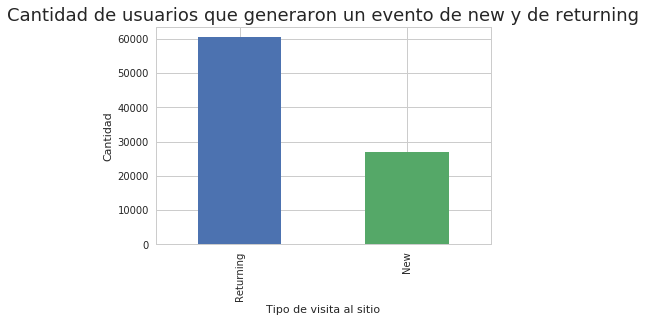

In [20]:
plot_new_vs_returning_counts = new_vs_returning_count.plot.bar()
plot_new_vs_returning_counts.set_title("Cantidad de usuarios que generaron un evento de new y de returning", fontsize=18)
plot_new_vs_returning_counts.set_xlabel("Tipo de visita al sitio")
plot_new_vs_returning_counts.set_ylabel("Cantidad")

In [21]:
# Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
news_visited_site.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,month_day,day_week,week_year,year_day
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,3,22,151
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,2018,5,29,1,22,149
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,2018,4,9,0,15,99
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,2018,4,6,4,14,96
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,2018,5,17,3,20,137


In [22]:
# Vemos los distintos tipos de accesos por primera vez
news_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.53
Computer                     0.45
Tablet                       0.02
Unknown                      0.00
Name: device_type, dtype: float64

De aqui podemos observar que la primera vez que acceden los usuarios a trocafone es casi igual de parejo entre computadoras de escritorio y celulares.

Veamos que sucede si vemos el tipo de dispositivo con el que vuelven los usuarios a la plataforma

In [23]:
# Vemos los distintos tipos de accesos en los eventos de visita
returning_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.49
Computer                     0.49
Tablet                       0.01
Unknown                      0.00
Name: device_type, dtype: float64

**Conclusion**: de estos datos inducimos que la experiencia del usuario en la plataforma es igual de buena tanto en mobile como en desktop

In [24]:
# Vemos los canales de los eventos de visita nuevos
news_visited_site['channel'].value_counts(normalize=True)

Paid                       0.66
Organic                    0.21
Direct                     0.08
Referral                   0.03
Social                     0.02
Email                      0.00
Unknown                    0.00
Name: channel, dtype: float64

In [25]:
# Seleccionamos los eventos de ad campaign hit
ad_campaign_hit = events.loc[events['event'] == 'ad campaign hit' , ['timestamp', 'event', 'person', 'url', 'campaign_source', 'year', 'month', 'month_day', 'day_week', 'week_year', 'year_day'] ]
ad_campaign_hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82827 entries, 0 to 1011285
Data columns (total 11 columns):
timestamp          82827 non-null datetime64[ns]
event              82827 non-null object
person             82827 non-null object
url                82756 non-null object
campaign_source    82796 non-null object
year               82827 non-null int64
month              82827 non-null int64
month_day          82827 non-null int64
day_week           82827 non-null int64
week_year          82827 non-null int64
year_day           82827 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 7.6+ MB


In [26]:
ad_campaign_hit.head(10)

,timestamp,event,person,url,campaign_source,year,month,month_day,day_week,week_year,year_day
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,criteo,2018,5,31,3,22,151
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,criteo,2018,5,29,1,22,149
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,google,2018,4,9,0,15,99
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,google,2018,5,24,3,21,144
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,google,2018,5,17,3,20,137
101,2018-05-17 00:11:10,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,google,2018,5,17,3,20,137
107,2018-06-08 12:15:33,ad campaign hit,001bb7eb,/comprar/iphone/6,google,2018,6,8,4,23,159
111,2018-05-29 12:56:08,ad campaign hit,001f1653,/comprar/samsung/galaxy-s6-flat,criteo,2018,5,29,1,22,149
119,2018-01-31 16:54:29,ad campaign hit,00204059,/,FacebookAds,2018,1,31,2,5,31
132,2018-02-01 23:32:02,ad campaign hit,00204059,/comprar/iphone,zanox,2018,2,1,3,5,32


In [27]:
urls = ad_campaign_hit['url'].value_counts()
print(urls)

/                                                   28323
/comprar/iphone                                      4132
/comprar/iphone/6s                                   3393
/comprar/iphone/6                                    3228
/comprar/samsung                                     2782
/comprar/iphone/iphone-5s                            2689
/comprar/samsung/galaxy-j5                           2446
/comprar/samsung/galaxy-s7-edge                      1972
/comprar/samsung/galaxy-s8                           1499
/comprar/samsung/galaxy-j7                           1465
/comprar/samsung/galaxy-s6-edge                      1415
/comprar/motorola                                    1154
/comprar/samsung/galaxy-s7                           1139
/comprar/iphone/7                                    1120
/comprar/samsung/galaxy-s6-flat                      1067
/comprar/iphone/iphone-6s-plus                        947
/comprar/samsung/samsung-gran-prime-duos-tv           944
/comprar/samsu

In [28]:
# Seleccionamos los eventos de static page
static_page = events.loc[events['event'] == 'staticpage' , ['timestamp', 'event', 'person', 'staticpage', 'year', 'month', 'month_day', 'day_week', 'week_year', 'year_day'] ]
static_page.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 254 to 1009809
Data columns (total 10 columns):
timestamp     3598 non-null datetime64[ns]
event         3598 non-null object
person        3598 non-null object
staticpage    3598 non-null object
year          3598 non-null int64
month         3598 non-null int64
month_day     3598 non-null int64
day_week      3598 non-null int64
week_year     3598 non-null int64
year_day      3598 non-null int64
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 309.2+ KB


In [29]:
static_page.head()

,timestamp,event,person,staticpage,year,month,month_day,day_week,week_year,year_day
254,2018-05-28 22:45:54,staticpage,0024ad28,how-to-buy,2018,5,28,0,22,148
350,2018-05-30 01:06:09,staticpage,002932b1,trust-trocafone,2018,5,30,2,22,150
1323,2018-06-01 03:36:45,staticpage,00751747,Quiosks,2018,6,1,4,22,152
2281,2018-04-26 22:21:56,staticpage,00c13dee,FaqEcommerce,2018,4,26,3,17,116
2963,2018-06-13 02:33:40,staticpage,010cfc29,AboutUs,2018,6,13,2,24,164


In [30]:
static_page['staticpage'].value_counts()

CustomerService                      1528
AboutUs                               443
FaqEcommerce                          347
Quiosks                               326
trust-trocafone                       243
galaxy-s8                             167
TermsAndConditionsReturnEcommerce     156
how-to-sell                            96
Conditions                             89
how-to-buy                             86
TermsAndConditionsEcommerce            59
club-trocafone                         46
PrivacyEcommerce                        9
black_friday                            3
Name: staticpage, dtype: int64

In [31]:
# Seleccionamos los eventos de search engine hit
search_engine_hit = events.loc[events['event'] == 'search engine hit' , ['timestamp', 'event', 'person', 'search_engine', 'year', 'month', 'month_day', 'day_week', 'week_year', 'year_day']]
search_engine_hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50957 entries, 10 to 1011276
Data columns (total 10 columns):
timestamp        50957 non-null datetime64[ns]
event            50957 non-null object
person           50957 non-null object
search_engine    50957 non-null object
year             50957 non-null int64
month            50957 non-null int64
month_day        50957 non-null int64
day_week         50957 non-null int64
week_year        50957 non-null int64
year_day         50957 non-null int64
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 4.3+ MB


In [32]:
search_engine_hit.head()

,timestamp,event,person,search_engine,year,month,month_day,day_week,week_year,year_day
10,2018-04-09 20:12:31,search engine hit,000a54b2,Google,2018,4,9,0,15,99
17,2018-05-24 11:21:07,search engine hit,000a54b2,Google,2018,5,24,3,21,144
47,2018-04-06 05:12:05,search engine hit,00184bf9,Google,2018,4,6,4,14,96
62,2018-04-06 05:12:59,search engine hit,00184bf9,Google,2018,4,6,4,14,96
97,2018-05-17 00:08:56,search engine hit,0019c395,Google,2018,5,17,3,20,137


In [33]:
search_engine_hit['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

In [39]:
events.sort_values(by=['person', 'timestamp'], ascending=False).head(20)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,month_day,day_week,week_year,year_day
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,4,0,23,155
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39,2018,6,4,0,23,155
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,4,0,23,155
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,4,0,23,155
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,"8,512.00",Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162
1011282,2018-06-11 12:29:14,viewed product,ffffa8d1,NaN,"8,512.00",Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162
1011281,2018-06-11 12:29:11,viewed product,ffffa8d1,NaN,"8,513.00",Samsung Galaxy S7 Edge,Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162
1011280,2018-06-11 12:28:47,searched products,ffffa8d1,NaN,NaN,NaN,NaN,NaN,NaN,"8541,8527,8513,9231,8555",s7 edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162
1011279,2018-06-11 12:25:41,generic listing,ffffa8d1,NaN,NaN,NaN,NaN,NaN,NaN,"6636,6593,7225,2820,6706,2750,12618,12604,1134...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162
1011276,2018-06-11 12:25:40,search engine hit,ffffa8d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,11,0,24,162


In [42]:
# g = events.groupby(['person', 'year_day'])
# print(list(g))
# g = g[[c for c in g if c not in list(g)] + list(g)]
events['person'].value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
f814cc35       1
9b061c0c       1
4d0a2de2       1
fb454676       1
4be8d5bc       1
d01528a2       1
85803502       1
d04977fc       1
f6d97ad4       1
83d0c645       1
c6f188f8       1
48b6bf1c       1
75d3ba09       1
e4ecabef       1
5d1f4de1       1
d2b2977e       1
247156f5       1
91e2563e       1
f0600e87       1
f5f3c345       1
6d8a8a1f       1
759683a2       1
25887fff       1
574e9726       1
c3a2cd56       1
a20ecf2c       1
defd70f8       1
c7260da2      

In [52]:
# Usuarios con menos de 3 eventos
less_three_events = events.loc[events['cant_event_person'] < 4]
less_three_events['person'].value_counts()

ca582b38    3
efa5a619    3
9556ed34    3
f78fc124    3
63282c94    3
7a8ffd8e    3
064bbc51    3
821f48d0    3
568702b8    3
c229a284    3
2acf0a84    3
667c6410    3
3c3956dc    3
a04e2175    3
0a94b0a4    3
7aa96478    3
db63c8b3    3
668d2093    3
fa346997    3
36914146    3
10093b39    3
dcb4bf70    3
6db7a428    3
806bb6b5    3
bb88e6b0    3
ada606c4    3
f2f58d4a    3
ca2b6206    3
5e748f8d    3
c16b8a6d    3
           ..
e5850292    1
dacd782b    1
eb9ff6bb    1
b91b0752    1
2129114c    1
09797a5f    1
d043ee75    1
358f06b1    1
002f3084    1
fc9bfdf4    1
1dc30a19    1
53d4a805    1
97c7a7ad    1
52cef90e    1
777dc456    1
cc0304e0    1
b63343c3    1
077bac4f    1
cbcd7b33    1
edf2f891    1
5e12e3af    1
fcc60d71    1
73cda39d    1
b99338fc    1
f107a1a7    1
09e6427e    1
7a04ad89    1
f401f1ff    1
fdbe5136    1
6a686a0d    1
Name: person, Length: 1411, dtype: int64

In [56]:
visited_site.dropna(axis='columns', inplace=True)
visited_site.head()

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,month_day,day_week,week_year,year_day
1,2018-05-31 23:38:05,visited site,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,3,22,151
5,2018-05-29 13:29:26,visited site,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,2018,5,29,1,22,149
9,2018-04-09 20:12:31,visited site,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,2018,4,9,0,15,99
16,2018-05-24 11:21:07,visited site,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0,2018,5,24,3,21,144
45,2018-04-06 05:12:05,visited site,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,2018,4,6,4,14,96


In [66]:
visited_site_brazil = visited_site.loc[visited_site['country'] == 'Brazil']


cities = visited_site_brazil['city'].value_counts()
regions = visited_site_brazil['region'].value_counts()
countries = visited_site_brazil['country'].value_counts()
print regions
print countries

Sao Paulo              24996
Unknown                12378
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
Amapa                    148
Acre                      96
Roraima                   67
Name: region, dtype: int64
Brazil    84308
Name: country, dtype: int64


In [69]:
devices_per_region = visited_site_brazil.groupby(['geo_region', 'device_type']).agg({'event': ['count']})
devices_per_region.head(20)

event
                        count
geo_region  device_type      
Unknown     Computer     5694
            Smartphone   6609
            Tablet         74
            Unknown         1
center west Computer     2526
            Smartphone   1828
            Tablet         49
            Unknown         5
north       Computer     1632
            Smartphone   1476
            Tablet         49
            Unknown         5
northeast   Computer     7766
            Smartphone   8619
            Tablet        306
            Unknown        59
south       Computer     3737
            Smartphone   2857
            Tablet         93
            Unknown         2